In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
EarthquakeDamage = pd.read_csv('train_labels.csv')
Earthquake = pd.read_csv('train_values.csv')

MainData = EarthquakeDamage.merge(Earthquake, on='building_id')

In [3]:
MainData.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [4]:
for col_name in MainData.columns:
    if(MainData[col_name].dtype == 'object'):
        MainData[col_name]= MainData[col_name].astype('category')
        MainData[col_name] = MainData[col_name].cat.codes

In [5]:
MainData.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,2,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,1,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,2,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,2,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,2,...,0,0,0,0,0,0,0,0,0,0


**Taking GeoLevel 1 , 2 , 3 as predictors for Damage Grade**

In [8]:
gl_1=pd.DataFrame(MainData['geo_level_1_id'])
print("Geo Level 1: ")
print("Data type : ", type(gl_1))
print("Data dimensions : ", gl_1.size)

gl_2=pd.DataFrame(MainData['geo_level_2_id'])
print("Geo Level 3: ")
print("Data type : ", type(gl_2))
print("Data dimensions : ", gl_2.size)

gl_3=pd.DataFrame(MainData['geo_level_3_id'])
print("Geo Level 3: ")
print("Data type : ", type(gl_3))
print("Data dimensions : ", gl_3.size)

Geo Level 1: 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  260601
Geo Level 3: 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  260601
Geo Level 3: 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  260601


In [9]:
gl_1.describe()

,geo_level_1_id
count,260601.000000
mean,13.900353
std,8.033617
min,0.000000
25%,7.000000
50%,12.000000
75%,21.000000
max,30.000000


In [10]:
gl_2.describe()

,geo_level_2_id
count,260601.000000
mean,701.074685
std,412.710734
min,0.000000
25%,350.000000
50%,702.000000
75%,1050.000000
max,1427.000000


In [11]:
gl_3.describe()

,geo_level_3_id
count,260601.000000
mean,6257.876148
std,3646.369645
min,0.000000
25%,3073.000000
50%,6270.000000
75%,9412.000000
max,12567.000000


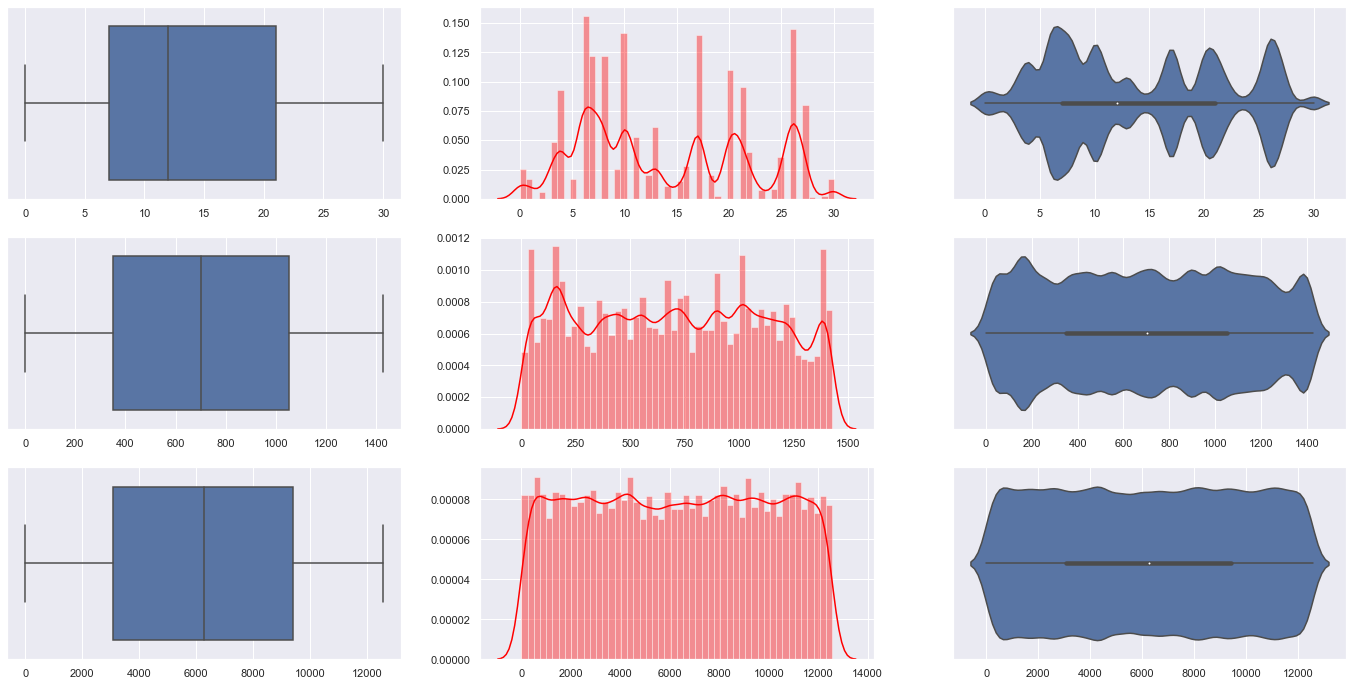

In [13]:
f, axes = plt.subplots(3, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Geo Level 1
sb.boxplot(gl_1, orient = "h", ax = axes[0,0])
sb.distplot(gl_1, color = "red", ax = axes[0,1])
sb.violinplot(gl_1, ax = axes[0,2])

# Plot the basic uni-variate figures for Geo Level 2
sb.boxplot(gl_2, orient = "h", ax = axes[1,0])
sb.distplot(gl_2, color = "red", ax = axes[1,1])
sb.violinplot(gl_2, ax = axes[1,2])

# Plot the basic uni-variate figures for Geo Level 3
sb.boxplot(gl_3, orient = "h", ax = axes[2,0])
sb.distplot(gl_3, color = "red", ax = axes[2,1])
sb.violinplot(gl_3, ax = axes[2,2])


Checking no of outliers for each level in box plot:

In [17]:
out_df=pd.DataFrame(MainData[['geo_level_1_id','geo_level_2_id','geo_level_3_id']])

Q1 = out_df.quantile(0.25) #Quartile 1
Q3 = out_df.quantile(0.75) #Quartile 3
DQR = Q3 - Q1 #difference between Quartile 1 and Quartile 3
print("Number of outliers is: ")
((out_df < (Q1 - 1.5 * DQR)) | (out_df > (Q3 + 1.5 * DQR))).sum() 

Number of outliers is: 


geo_level_1_id    0
geo_level_2_id    0
geo_level_3_id    0
dtype: int64

In [18]:
print("Damage Grade: ")
print("Data type : ", type(EarthquakeDamage))
print("Data dimensions : ", EarthquakeDamage.size)

Damage Grade: 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  521202
